# Bank Marketing

### Introduction

The dataset is from UCI and is created by Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012 (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). It has 21 columns and 41188 rows. 

Attribute information:

Input variables:
   ### Bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
   ### Related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone")
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
   ### Other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
   ### Social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [1]:
#importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the csvs files and chcking their heads
df= pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Shape of the dataset
df.shape

(41188, 21)

In [4]:
#getting statistical data on the dataset
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
#getting the information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
#getting the data types in columns
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


#### Exploratory Data Analysis

In [111]:
#binning the contact duration in ~360 second bins
bins = np.linspace(df.duration.min(), df.duration.max(), 17)
labels = ['0-5','5-10','10-15','15-20', '20-25', '25-30', '30-35' ,'35-40', '40-45','45-50','50-55', '55-60', '60-65', 
          '65-70','70-75','75-80']
df['duration(min)'] = pd.cut(df['duration'], bins=bins, labels=labels)

In [112]:
#binning the number of euribor 3 month rate - daily indicator 
bins = np.linspace(df.euribor3m.min(), df.euribor3m.max(), 5)
labels = ['0.634-1.737','1.737-2.839','2.839-3.942','3.942-5.045']
         
df['euribor3m(bins)'] = pd.cut(df['euribor3m'], bins=bins, labels=labels)

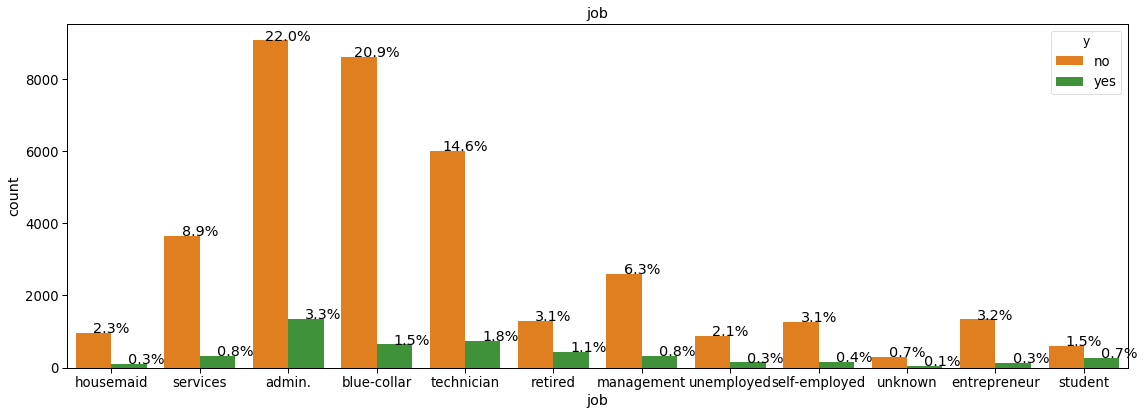

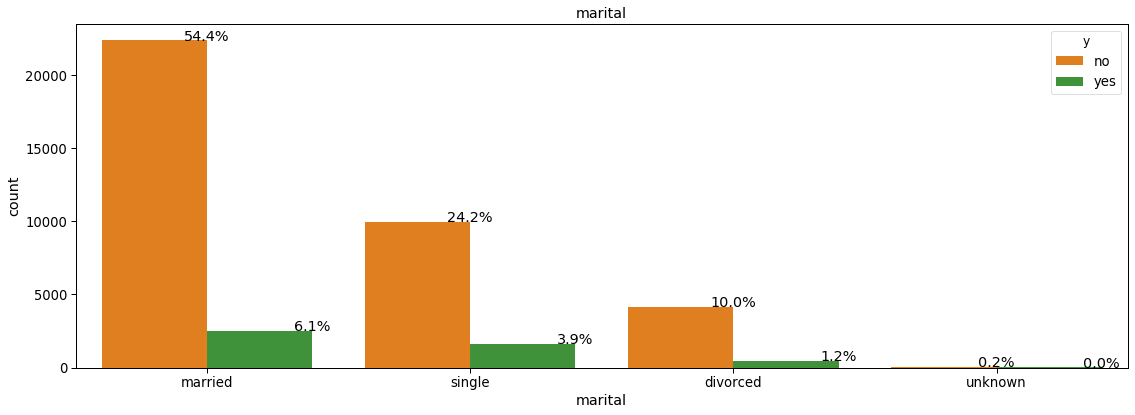

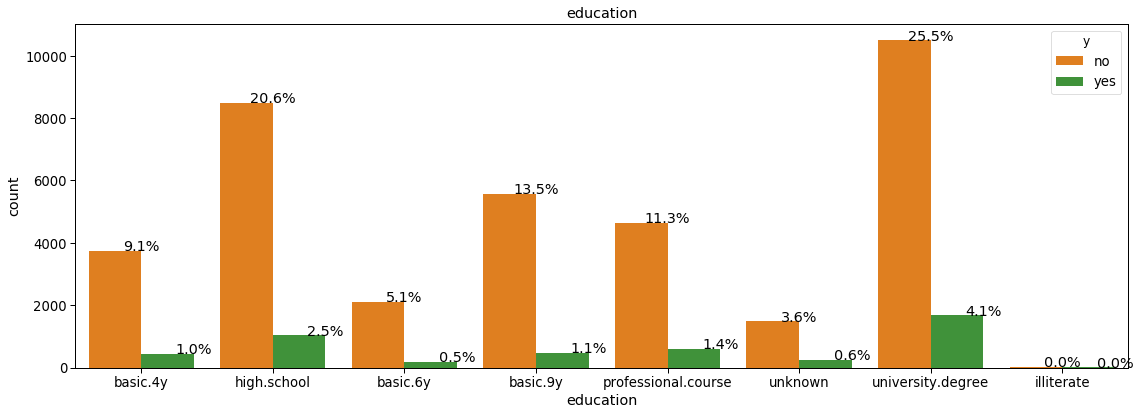

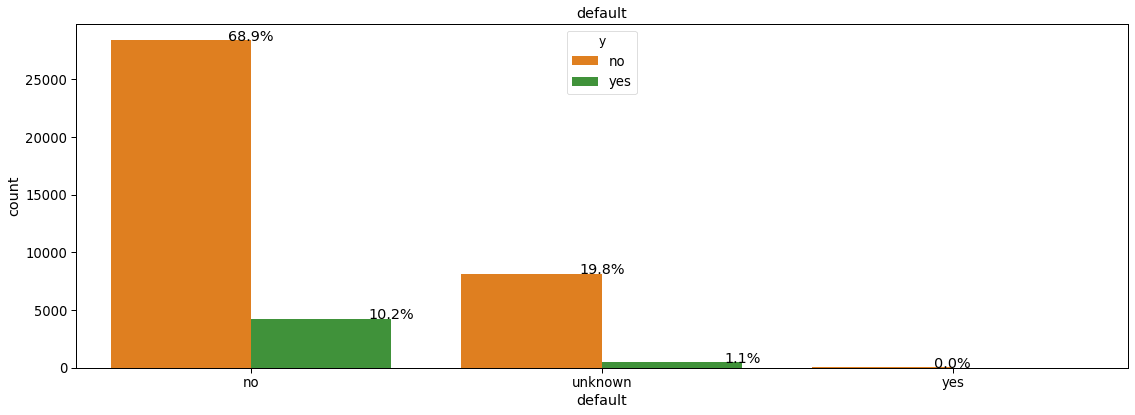

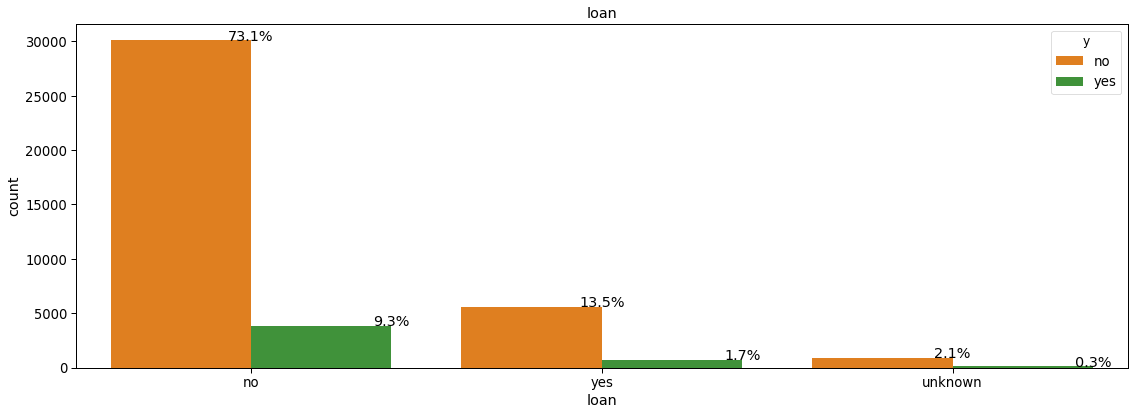

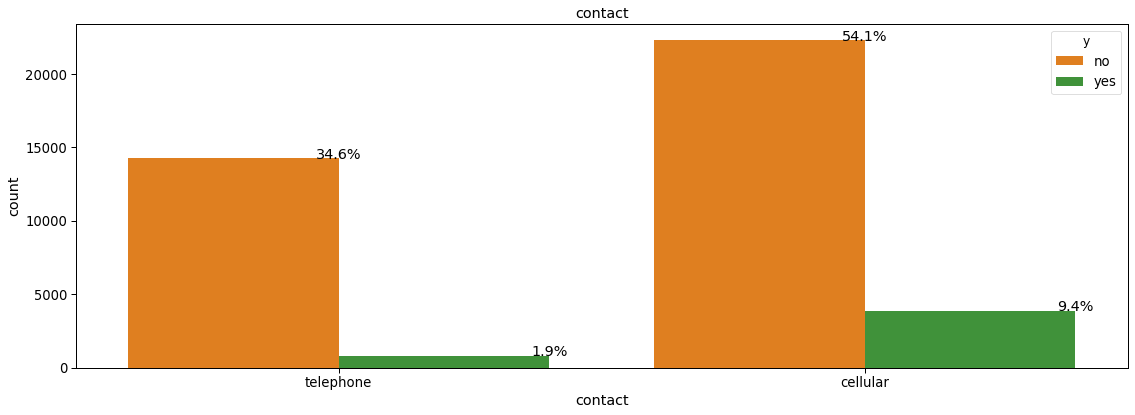

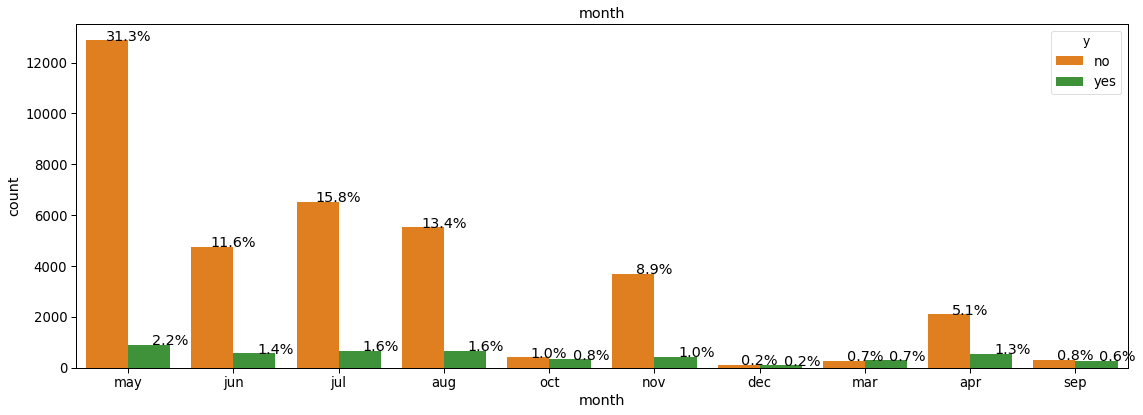

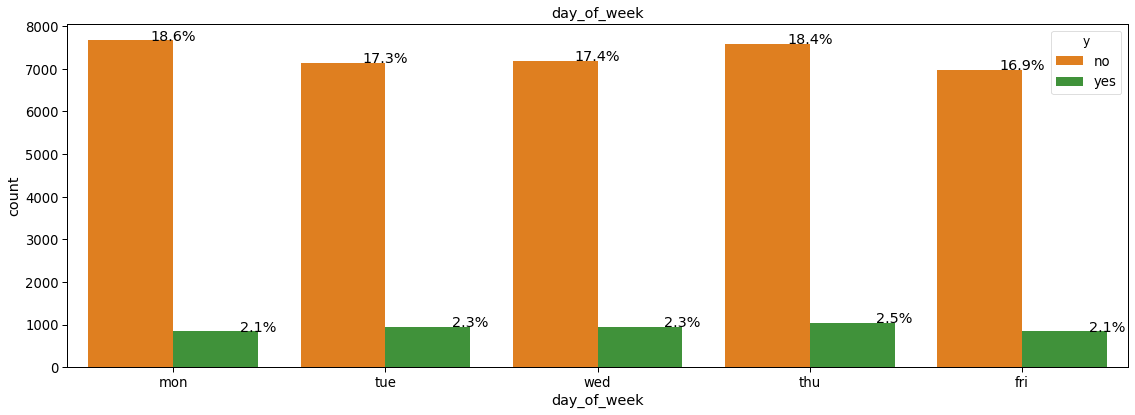

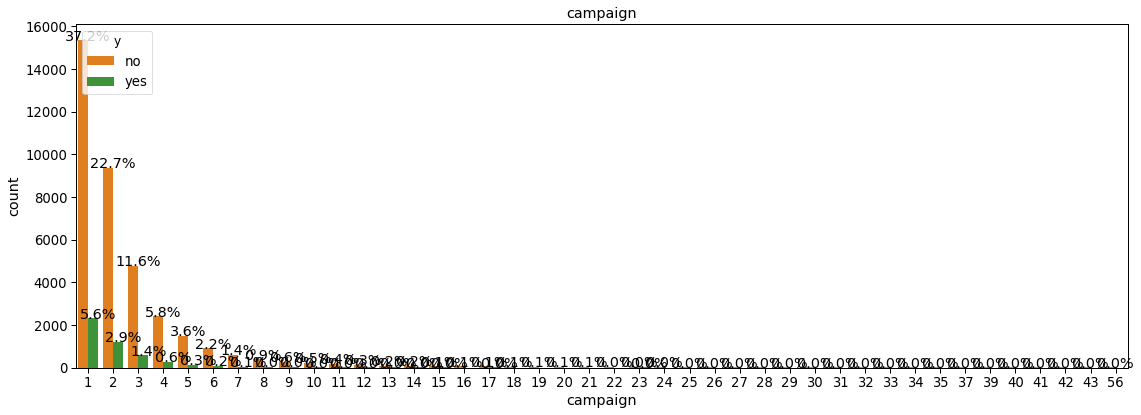

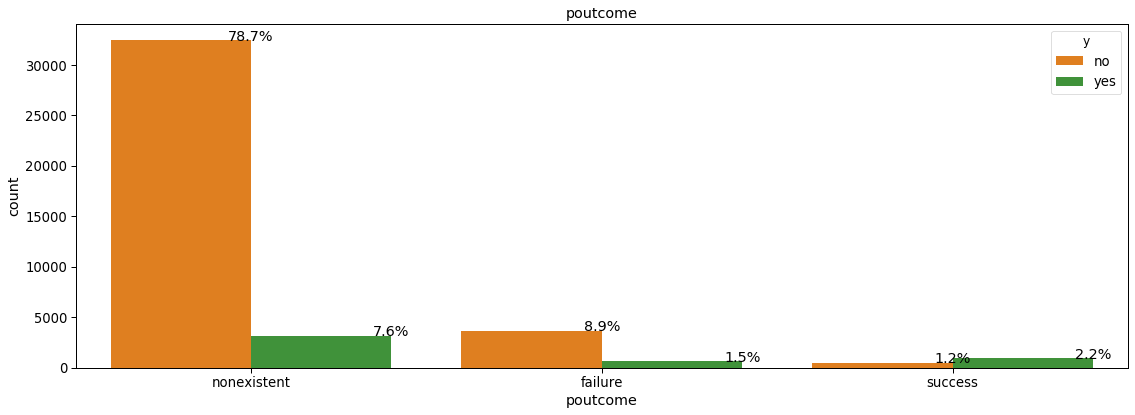

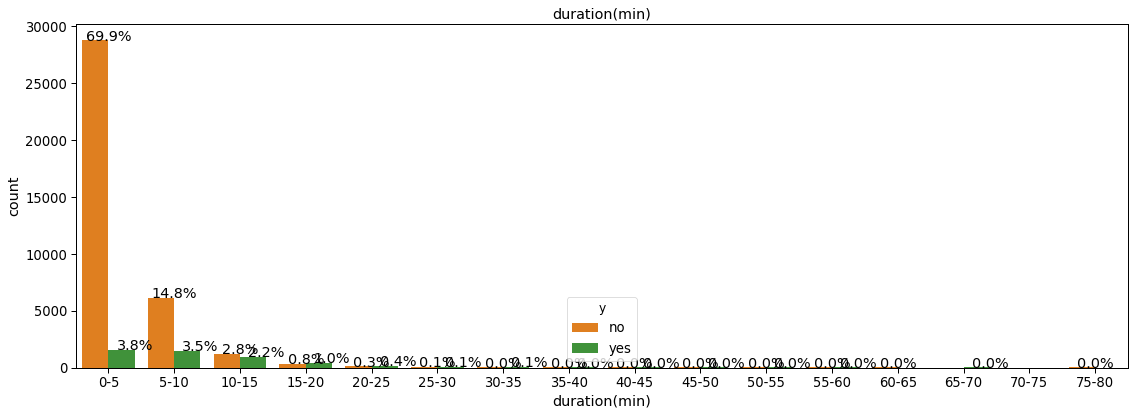

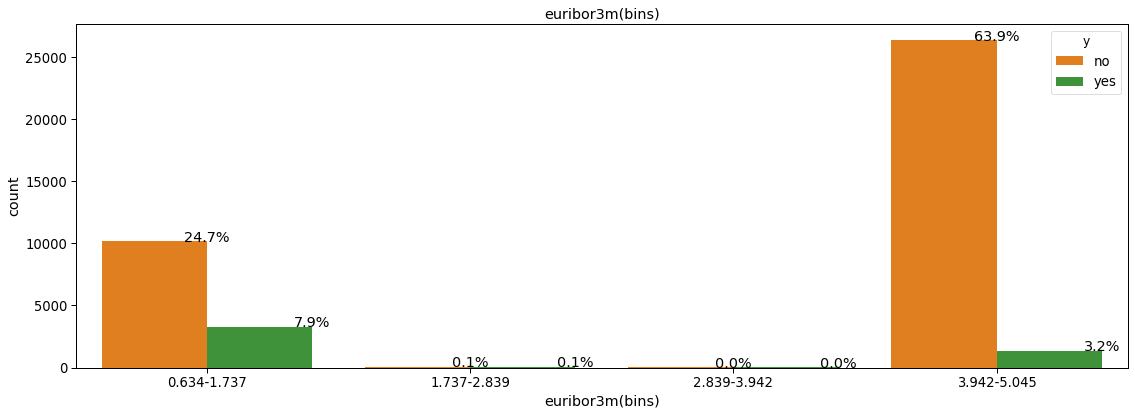

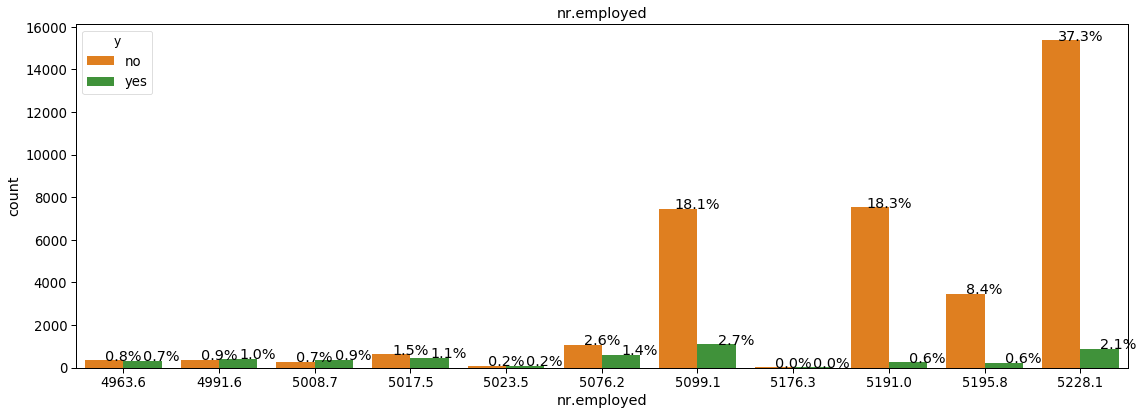

['2.3%',
 '8.9%',
 '22.0%',
 '20.9%',
 '14.6%',
 '3.1%',
 '6.3%',
 '2.1%',
 '3.1%',
 '0.7%',
 '3.2%',
 '1.5%',
 '0.3%',
 '0.8%',
 '3.3%',
 '1.5%',
 '1.8%',
 '1.1%',
 '0.8%',
 '0.3%',
 '0.4%',
 '0.1%',
 '0.3%',
 '0.7%',
 '54.4%',
 '24.2%',
 '10.0%',
 '0.2%',
 '6.1%',
 '3.9%',
 '1.2%',
 '0.0%',
 '9.1%',
 '20.6%',
 '5.1%',
 '13.5%',
 '11.3%',
 '3.6%',
 '25.5%',
 '0.0%',
 '1.0%',
 '2.5%',
 '0.5%',
 '1.1%',
 '1.4%',
 '0.6%',
 '4.1%',
 '0.0%',
 '68.9%',
 '19.8%',
 '0.0%',
 '10.2%',
 '1.1%',
 'nan%',
 '73.1%',
 '13.5%',
 '2.1%',
 '9.3%',
 '1.7%',
 '0.3%',
 '34.6%',
 '54.1%',
 '1.9%',
 '9.4%',
 '31.3%',
 '11.6%',
 '15.8%',
 '13.4%',
 '1.0%',
 '8.9%',
 '0.2%',
 '0.7%',
 '5.1%',
 '0.8%',
 '2.2%',
 '1.4%',
 '1.6%',
 '1.6%',
 '0.8%',
 '1.0%',
 '0.2%',
 '0.7%',
 '1.3%',
 '0.6%',
 '18.6%',
 '17.3%',
 '17.4%',
 '18.4%',
 '16.9%',
 '2.1%',
 '2.3%',
 '2.3%',
 '2.5%',
 '2.1%',
 '78.7%',
 '8.9%',
 '1.2%',
 '7.6%',
 '1.5%',
 '2.2%']

In [252]:
#Analyzing categorical data
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 
                         'poutcome', 'duration(min)', 'euribor3m(bins)', 'nr.employed']
per=[]
for col in categorcial_variables:
    plt.figure(figsize=(16,6))
    #sns.barplot(df[col].value_counts().index, df[col].value_counts().values)
    sns.set_context("paper", font_scale=1.5)
    ax = sns.countplot(x=col, data=df, hue='y', palette='Paired_r')
    plt.title(col)
    plt.tight_layout()
    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha="center")
        
        if col in ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 
                         'poutcome']:
            per.append(percentage)
            
            
    
    plt.show()
    
per

In [359]:
features=['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week','poutcome']
difference = []
feature=[]
for col in features:
    list1 = per[:len(df[col].value_counts().index)]
    list1 =[float(i.split('%', 1)[0]) for i in list1]
    list2 = per[len(df[col].value_counts().index):2*(len(df[col].value_counts().index))]
    list2 =[float(i.split('%', 1)[0]) for i in list2]
    
    zip_object = zip(list1, list2)
    i=0
    for list1_i, list2_i in zip_object:
        feature.append(df[col].value_counts().index[i])
        difference.append(list1_i-list2_i)
        diff_dict={}
        diff_dict['Feature']= feature
        diff_dict['Normalized relative frequency']=difference
        normalized_relative_frequency=pd.DataFrame(diff_dict)
        i=+1
        
        
normalized_relative_frequency


IndentationError: unexpected indent (<ipython-input-359-5e59d1764d1d>, line 12)

##### Normalized relative frequency of the target class per category

The distribution of each class per feature is normalized and then the differences between positive and negative frequencies were plotted. Positive values means this category favors clinets that will subscribe and negative values categories that favor not subscribing.

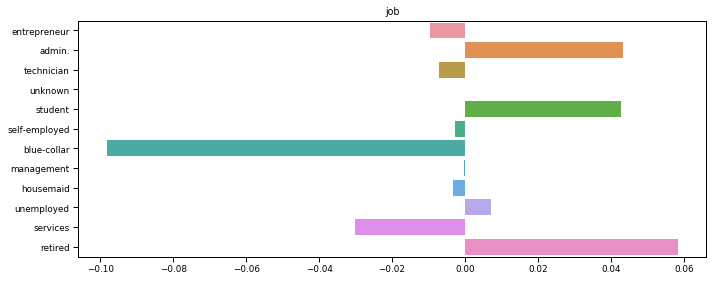

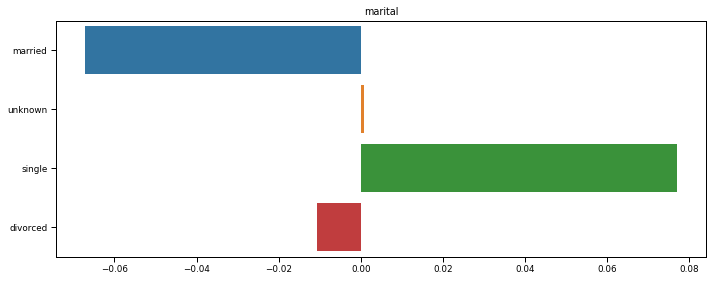

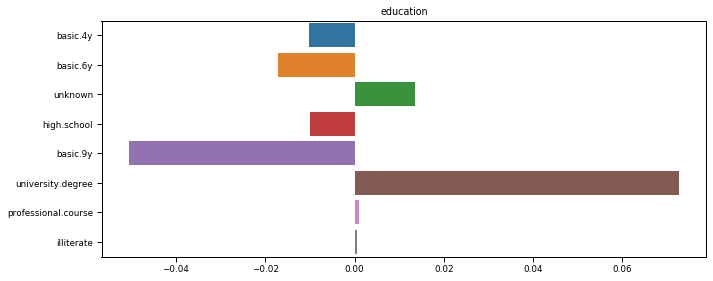

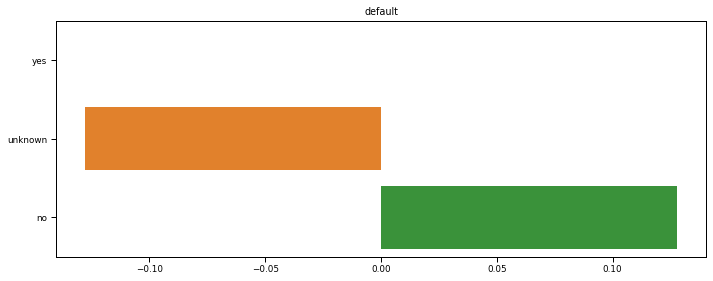

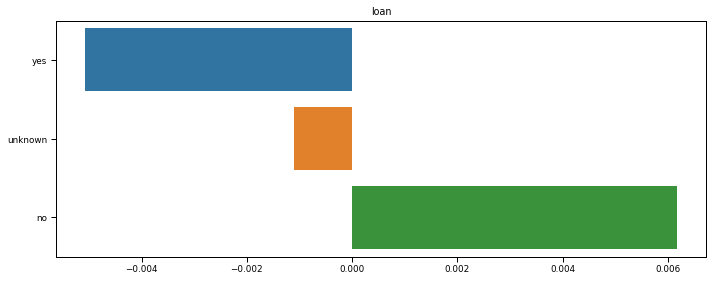

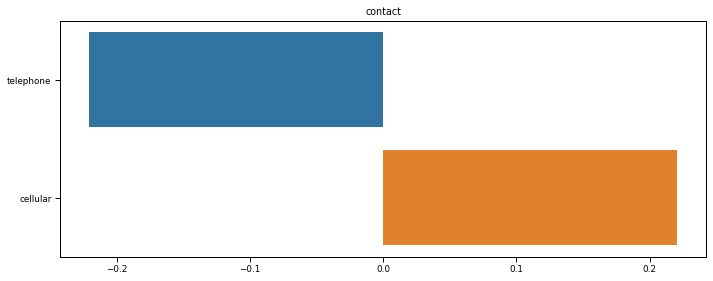

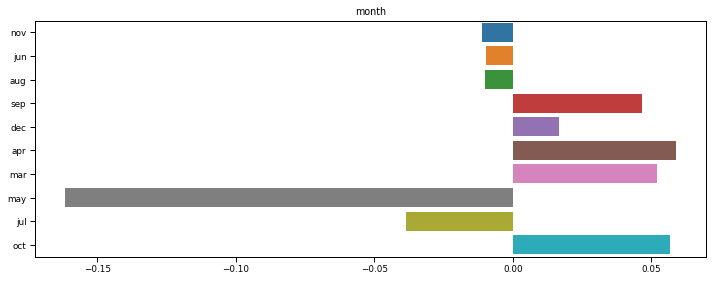

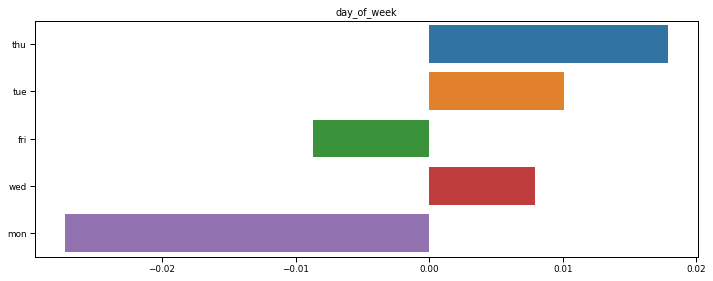

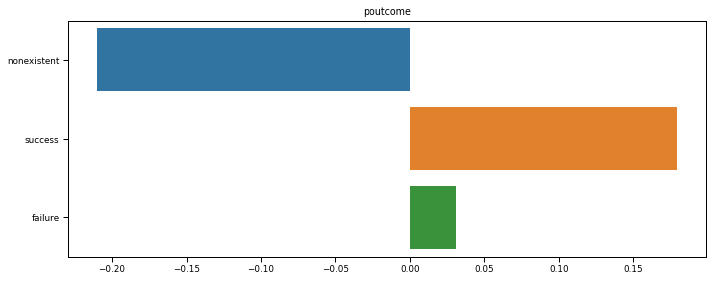

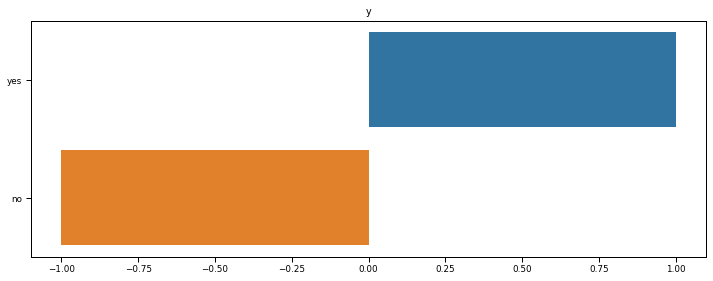

In [127]:

categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 
                         'poutcome','y']
for col in categorcial_variables:
    sns.set_context("paper", font_scale=1)
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    ax= sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()


In [211]:
#Determining the number of missing values in the dataframe
pd.DataFrame(df.isnull().sum(), columns=['Number of Null Values'])

,Number of Null Values
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [204]:
#Determining the number of unknown values in 
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 
                         'poutcome','y']
feature_list=[]
number_list=[]
for coll in categorcial_variables:
    df1=df[df[coll]=='unknown']
    feature_list.append(coll)
    number_list.append(len(df1))
Dict={}
Dict['Feature'] = feature_list
Dict['Number of Unknown Values'] = number_list
    
    #print(coll+":",len(df1))
unknowdf=pd.DataFrame(Dict)
    #unknowndf['Feature'] = coll
    #unknowndf['Number of Unknown Values']=len(df1)

unknowdf

,Feature,Number of Unknown Values
0,job,330
1,marital,80
2,education,1731
3,default,8597
4,loan,990
5,contact,0
6,month,0
7,day_of_week,0
8,poutcome,0
9,y,0


In the dataset there are unknown values. Missing (NAN)values are from the columns created during Exploratory Data Analysis.
The number of unknown values for each of the features is indicated above. Among these features, 'education', 'job', 'housing', and 'loan' are the most significant ones. The number of unknowns for 'marital' is 80 and lowest. The value 'unknown' for the default feature is actually a separate value and that is because the customer has not been interested in disclosing the information. So we will be imputing the unn=know values for the features 'education', 'job', 'housing' and 'loan'. 

Text(0.5, 0, 'Target Class')

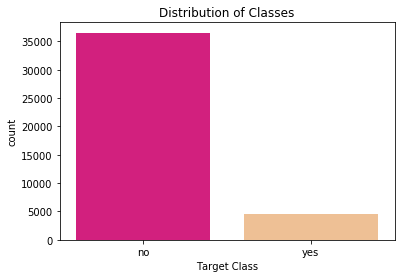

In [40]:
#making a countplot of the variable to be predicted
sns.countplot(x=df['y'], palette='Accent_r')
plt.title('Distribution of Classes')
plt.xlabel('Target Class')

In [8]:
#determining the count of each of the classes
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

The dataset is very imbalanced.